In [1]:
import pandas as pd

In [2]:
datafn = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/figure_6/final_figures/kaur.caqtls.tsv", sep="\t", header=0)



In [3]:
datafn.columns

Index(['chr', 'pos_x', 'allele1', 'allele2', 'rsid_x', 'ATAC.572M.logfc.mean',
       'ATAC.572M.jsd.mean', 'ATAC.572M.CRS', 'ATAC.50M.logfc.mean',
       'ATAC.50M.jsd.mean', 'ATAC.50M.CRS', 'DNASE.logfc.mean',
       'DNASE.jsd.mean', 'DNASE.CRS', 'enformer_recomputed', 'pvalue', 'beta',
       'dbsnp_rsdi', 'pos_y', 'ref', 'alt', 'rsid_y', 'DNASE_SAD',
       'DNASE_SAR'],
      dtype='object')

In [4]:
datafn["pos0"] = datafn["pos_x"] - 1

In [5]:
datafn = datafn[['chr', "pos0", 'pos_x', 'allele1', 'allele2', 'rsid_x', 'ATAC.572M.logfc.mean',
       'ATAC.572M.jsd.mean', 'ATAC.572M.CRS', 'ATAC.50M.logfc.mean',
       'ATAC.50M.jsd.mean', 'ATAC.50M.CRS', 'DNASE.logfc.mean',
       'DNASE.jsd.mean', 'DNASE.CRS', 'enformer_recomputed', 'pvalue', 'beta',
       'dbsnp_rsdi', 'pos_y', 'ref', 'alt', 'rsid_y', 'DNASE_SAD',
       'DNASE_SAR']]

In [6]:
datafn.shape

(125682, 25)

In [7]:
sum(datafn["pvalue"]<10**-7)

8067

In [8]:
# import pybedtools
# peaks_data_merged=pd.read_csv("/mnt/lab_data2/anusri/kumasaka/new_download/Kumasaka_2018_wgs/sumstats/merged.peaks.eu.top.20k.bed", sep="\t", header=None)
# print(peaks_data_merged.head())
# beds_var = pybedtools.BedTool.from_dataframe(datafn)
# peak_bed = pybedtools.BedTool.from_dataframe(peaks_data_merged) # this is a merged peaks file
# vars_in_bed = beds_var.intersect(peak_bed, c=True)
# vars_in_bedn = vars_in_bed.to_dataframe(names=datafn.columns.tolist() + ["count"])
# datafn = vars_in_bedn[vars_in_bedn["count"]>0]

In [9]:
# datafn.shape

In [10]:
# sum(datafn["pvalue"]<10**-7)

In [11]:
datafn.columns

Index(['chr', 'pos0', 'pos_x', 'allele1', 'allele2', 'rsid_x',
       'ATAC.572M.logfc.mean', 'ATAC.572M.jsd.mean', 'ATAC.572M.CRS',
       'ATAC.50M.logfc.mean', 'ATAC.50M.jsd.mean', 'ATAC.50M.CRS',
       'DNASE.logfc.mean', 'DNASE.jsd.mean', 'DNASE.CRS',
       'enformer_recomputed', 'pvalue', 'beta', 'dbsnp_rsdi', 'pos_y', 'ref',
       'alt', 'rsid_y', 'DNASE_SAD', 'DNASE_SAR'],
      dtype='object')

In [12]:
import numpy as np

In [13]:
datafn["log10p"] = np.log10(datafn["pvalue"])*-1

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve
from scipy.stats import pearsonr

random_bc = []
chrombpnet = {}
chrombpnet_pear = {}
chrombpnet_pear1 = {}
chrombpnet_pear_abs = {}
chrombpnet_pear_abs1 = {}
enformer_dnase_roc = []
enformer_dnase_pear = []
enformer_dnase_pear_abs = []
sar_enformer_dnase_roc = []
sar_enformer_dnase_pear = []
sar_enformer_dnase_pear_abs = []

chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

chrombpnet_pear["ChromBPNet DNase (68M)"] = []
chrombpnet_pear["ChromBPNet ATAC (572M)"] = []
chrombpnet_pear["ChromBPNet ATAC (50M)"] = []

chrombpnet_pear1["ChromBPNet DNase (68M)"] = []
chrombpnet_pear1["ChromBPNet ATAC (572M)"] = []
chrombpnet_pear1["ChromBPNet ATAC (50M)"] = []

chrombpnet_pear_abs["ChromBPNet DNase (68M)"] = []
chrombpnet_pear_abs["ChromBPNet ATAC (572M)"] = []
chrombpnet_pear_abs["ChromBPNet ATAC (50M)"] = []
chrombpnet_pear_abs1["ChromBPNet DNase (68M)"] = []
chrombpnet_pear_abs1["ChromBPNet ATAC (572M)"] = []
chrombpnet_pear_abs1["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(6,25,2):
   
    dataf1 = datafn[datafn["log10p"]>threshold]
    dataf1["label"] = 1

    
    dataf2 = datafn[datafn["log10p"]<3]
    dataf2["label"] = 0

    
    
    dataf = pd.concat([dataf1, dataf2])
    
    total = dataf.shape[0]
    sigs = sum(dataf["label"])
    print("sig",sigs)
    print(total)
    print(np.round(sigs/total,3))
    
    random_bc.append(np.round(sigs/total,3))
    
    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["DNASE.CRS"]))
  
    pear = pearsonr(dataf1["DNASE.logfc.mean"], dataf1["beta"])[0]
    chrombpnet_pear["ChromBPNet DNase (68M)"].append(pear)
    pear = pearsonr(dataf1["DNASE.jsd.mean"]*np.sign(dataf1["DNASE.logfc.mean"]), dataf1["beta"])[0]
    chrombpnet_pear1["ChromBPNet DNase (68M)"].append(pear)
    
    pear = pearsonr(abs(dataf1["DNASE.logfc.mean"]), abs(dataf1["beta"]))[0]
    chrombpnet_pear_abs["ChromBPNet DNase (68M)"].append(pear)
    pear = pearsonr(abs(dataf1["DNASE.jsd.mean"]), abs(dataf1["beta"]))[0]
    chrombpnet_pear_abs1["ChromBPNet DNase (68M)"].append(pear)

    chrombpnet["ChromBPNet DNase (68M)"].append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["ATAC.572M.CRS"]))

    pear = pearsonr(dataf1["ATAC.572M.logfc.mean"], dataf1["beta"])[0]
    chrombpnet_pear["ChromBPNet ATAC (572M)"].append(pear)
    pear = pearsonr(abs(dataf1["ATAC.572M.logfc.mean"]), abs(dataf1["beta"]))[0]
    chrombpnet_pear_abs["ChromBPNet ATAC (572M)"].append(pear)

    pear = pearsonr(dataf1["ATAC.572M.jsd.mean"]*np.sign(dataf1["ATAC.572M.logfc.mean"]), dataf1["beta"])[0]
    chrombpnet_pear1["ChromBPNet ATAC (572M)"].append(pear)
    pear = pearsonr(abs(dataf1["ATAC.572M.jsd.mean"]), abs(dataf1["beta"]))[0]
    chrombpnet_pear_abs1["ChromBPNet ATAC (572M)"].append(pear)
  
  
    chrombpnet["ChromBPNet ATAC (572M)"].append(roc_auc)
    
    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["ATAC.50M.CRS"]))
    pear = pearsonr(dataf1["ATAC.50M.logfc.mean"], dataf1["beta"])[0]
    chrombpnet_pear["ChromBPNet ATAC (50M)"].append(pear)
    pear = pearsonr(abs(dataf1["ATAC.50M.logfc.mean"]), abs(dataf1["beta"]))[0]
    chrombpnet_pear_abs["ChromBPNet ATAC (50M)"].append(pear)
 
    pear = pearsonr(dataf1["ATAC.50M.jsd.mean"]*np.sign(dataf1["ATAC.50M.logfc.mean"]), dataf1["beta"])[0]
    chrombpnet_pear1["ChromBPNet ATAC (50M)"].append(pear)
    pear = pearsonr(abs(dataf1["ATAC.50M.jsd.mean"]), abs(dataf1["beta"]))[0]
    chrombpnet_pear_abs1["ChromBPNet ATAC (50M)"].append(pear)

  
    chrombpnet["ChromBPNet ATAC (50M)"].append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["enformer_recomputed"]))

    pear = pearsonr(dataf1["enformer_recomputed"]*-1, dataf1["beta"])[0]
    enformer_dnase_pear.append(pear)
    pear = pearsonr(abs(dataf1["enformer_recomputed"]), abs(dataf1["beta"]))[0]
    enformer_dnase_pear_abs.append(pear)
    
    enformer_dnase_roc.append(roc_auc)
    
    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["DNASE_SAR"]))
    pear = pearsonr(dataf1["DNASE_SAR"], dataf1["beta"])[0]
    sar_enformer_dnase_pear.append(pear)
    pear = pearsonr(abs(dataf1["DNASE_SAR"]), abs(dataf1["beta"]))[0]
    sar_enformer_dnase_pear_abs.append(pear)
    
    sar_enformer_dnase_roc.append(roc_auc)


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


sig 9676
115236
0.084
sig 6735
112295
0.06
sig 4860
110420
0.044
sig 3582
109142
0.033
sig 2591
108151
0.024
sig 1859
107419
0.017
sig 1347
106907
0.013
sig 944
106504
0.009
sig 611
106171
0.006
sig 408
105968
0.004


ChromBPNet DNase (68M) [0.2692395185868811, 0.24315720442613264, 0.22615296810487026, 0.20780985036511346, 0.18949205864856145, 0.1668659313824714, 0.15272817321403684, 0.14630799107191056, 0.12530026794295016, 0.11802422815451459]
enf [0.3056518479514423, 0.2825133914506326, 0.26536386736172896, 0.24406406011192894, 0.2253705158983582, 0.20358446690139884, 0.18899678325344557, 0.17735446403746186, 0.1596878880775609, 0.14200417942823895]
enf [0.21941848726102864, 0.18788802680967356, 0.16808110134224757, 0.14581875929000016, 0.12892207288517493, 0.10642228213287598, 0.09500806794934488, 0.07653766511457176, 0.06133075121526359, 0.052189886626203205]


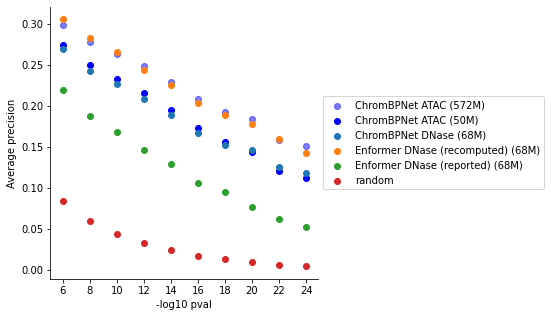

In [15]:

fig, ax = plt.subplots(figsize=(6,5))
colors = ["blue", "blue"]
alphas = [0.5, 1.0]
idx=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)"]:
    ax.scatter(np.arange(6,25,2).astype(str), chrombpnet[key], label=key, c="blue", alpha=alphas[idx])
    idx+=1
    
key="ChromBPNet DNase (68M)"
ax.scatter(np.arange(6,25,2).astype(str), chrombpnet[key], label=key)
print(key, chrombpnet[key])
ax.scatter(np.arange(6,25,2).astype(str), enformer_dnase_roc, label="Enformer DNase (recomputed) (68M)")
print("enf", enformer_dnase_roc)
ax.scatter(np.arange(6,25,2).astype(str), sar_enformer_dnase_roc, label="Enformer DNase (reported) (68M)")
print("enf", sar_enformer_dnase_roc)

ax.scatter(np.arange(6,25,2).astype(str), random_bc, label="random")

ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10 pval")
ax.set_ylabel("Average precision")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.savefig("subfigs/kaur_caqtls_auprc_compare.pdf", transparent=True, dpi=300)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


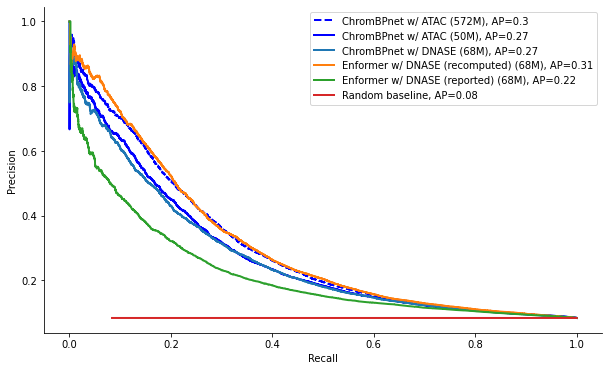

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve


fig, ax = plt.subplots(figsize=(10,6))

threshold=6
dataf1 = datafn[datafn["log10p"]>threshold]
dataf1["label"] = 1


dataf2 = datafn[datafn["log10p"]<3]
dataf2["label"] = 0

dataf = pd.concat([dataf1, dataf2])


######################################

keyd="ATAC.572M.CRS"
label=dataf["label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (572M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="ATAC.50M.CRS"
label=dataf["label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (50M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="DNASE.CRS"
label=dataf["label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ DNASE (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="enformer_recomputed"
label=dataf["label"].astype(int)
score=abs(dataf[keyd])
title="Enformer w/ DNASE (recomputed) (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
enformer_auc_recomp = roc_auc

ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

# keyd="pred.enformer.encsr000emt.varscore.sad"
# label=dataf["var.label"].astype(int)
# score=abs(dataf[keyd])
# title="Enformer w/ DNASE SAD (50M)"

# fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
# roc_auc = metrics.average_precision_score(label, score)
# ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################


keyd="DNASE_SAR"
label=dataf["label"].astype(int)
score=abs(dataf[keyd])
title="Enformer w/ DNASE (reported) (68M)"


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))
enformer_auc = roc_auc

######################################

roc_auc=sum(dataf["label"]==1)/len(dataf["label"])
ax.plot(fpr_chrombpnet, [sum(dataf["label"]==1)/len(dataf["label"])]*len(fpr_chrombpnet), linewidth=2, label="Random baseline, AP="+str(round(roc_auc,2)))


ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc='upper right')
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

plt.savefig("subfigs/kaur_caqtls_auprc.pdf", transparent=True, dpi=300)

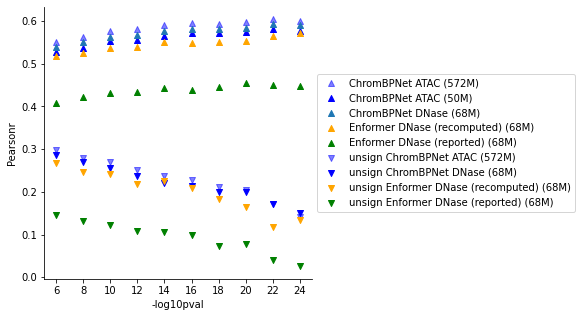

In [25]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ["blue", "blue", "C0"]
alphas= [0.5, 1.0, 1.0, 1.0] 

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    #print(len(chrombpnet_pear[key]))
    #print(len(np.arange(7,25,2)))
    #print(key)
    #print(chrombpnet_pear[key])
    ax.scatter(np.arange(6,25,2).astype(str), chrombpnet_pear[key], marker="^", label=key, color=colors[i], alpha=alphas[i])
    i+=1


ax.scatter(np.arange(6,25,2).astype(str), enformer_dnase_pear ,  marker="^", label="Enformer DNase (recomputed) (68M)", color="orange")
ax.scatter(np.arange(6,25,2).astype(str), sar_enformer_dnase_pear ,  marker="^", label="Enformer DNase (reported) (68M)", color="green")

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(6,25,2).astype(str), chrombpnet_pear_abs[key], marker="v", label="unsign "+key, color=colors[i], alpha=alphas[i])
    i+=1
    
ax.scatter(np.arange(6,25,2).astype(str), enformer_dnase_pear_abs, marker="v", label="unsign " +"Enformer DNase (recomputed) (68M)", color="orange")
ax.scatter(np.arange(6,25,2).astype(str), sar_enformer_dnase_pear_abs, marker="v", label="unsign " +"Enformer DNase (reported) (68M)", color="green")


ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10pval")
ax.set_ylabel("Pearsonr")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()
#plt.ylim((0.4,0.6))
plt.savefig("subfigs/kaur_caqtls_pearsonr_compare.pdf", transparent=True, dpi=300)


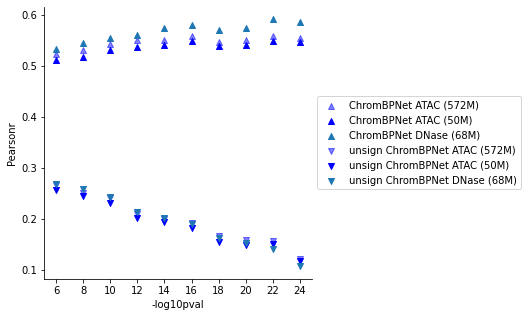

In [26]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ["blue", "blue", "C0"]
alphas= [0.5, 1.0, 1.0, 1.0] 

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    #print(len(chrombpnet_pear[key]))
    #print(len(np.arange(7,25,2)))
    #print(key)
    #print(chrombpnet_pear[key])
    ax.scatter(np.arange(6,25,2).astype(str), chrombpnet_pear1[key], marker="^", label=key, color=colors[i], alpha=alphas[i])
    i+=1


i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(6,25,2).astype(str), chrombpnet_pear_abs1[key], marker="v", label="unsign "+key, color=colors[i], alpha=alphas[i])
    i+=1


ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10pval")
ax.set_ylabel("Pearsonr")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()
#plt.ylim((0.4,0.6))
plt.savefig("subfigs/kaur_caqtls_jsd_pearsonr_compare.pdf", transparent=True, dpi=300)


(0.5497003608149088, 0.0)
(0.2969767838519738, 3.0288812710935697e-196)


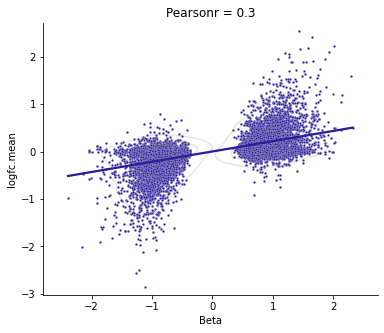

In [27]:
import seaborn as sns
import scipy

threshold=6
dataf1 = datafn[datafn["log10p"]>threshold]
   
data = pd.DataFrame()
data["logfc.mean"] = dataf1["ATAC.572M.logfc.mean"]
data["Beta"] = dataf1["beta"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="#2B1C97", rasterized=True)
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#2B1C97")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
atc_pear = scipy.stats.pearsonr(abs(data["logfc.mean"]),abs(data["Beta"]))
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))


plt.savefig("subfigs/kaur_caqtls_pearsonr.pdf", transparent=True, dpi=300)